# Demonstrating Overfitting

## Set up dataset

I have chosen the safest dataset MNIST for demonstration.

In setting up the data, I should set up a training set and a test set. The test set should be large enough to give a reasonably accurate assessment of the error-rate (or loss) of your models: preferably at least 10,000 examples.

For the learning curve experiment (below), I will need to construct training sets of different sizes, with the largest at least 10 times the smallest. For the MNIST data, for example, I(one can) have smallest training set might be 500, with sizes 500, 1000, 2000, 4000, 8000, 16000, 32000, and perhaps 60000 if you have time.

## 1.Set up model 

I have Set up a Pytorch model (you may find it helpful to keep it simple and fast to train). I have Trained on an intermediate-sized dataset (if you are using MNIST, say 2000 or 4000). 


I have also Plot the loss and error rate as a function of training epochs. 


Ensure that your model is complex enough to *overfit* the training data: that is the loss/error-rate on the training set should be below your target loss/error-rate, and the loss/error-rate on the validation set should be higher than this (preferably higher than your target error-rate). 

In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Hyper parameters used in this code

### Batch size= 32

### L2 Regularization [0.0001,0.001, 0.01,0.1]

###  Drop Regularization [0.25,0.50,0.75]

### epochs = 2 and 3, #reason for using lower epochs: lack of computational source

### Learning rate used: 1e-5

In [8]:
trans = transforms.Compose([
                                 transforms.ToTensor()
])  
train = datasets.MNIST('', train = True, transform = trans, download = True)

In [9]:
train, valid = random_split(train,[50000,10000])

###   batch size = 32 

In [10]:
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)

### Building a MLP and CNN model. First I tried to build MLP model 

In [12]:
# Building Our Mode
class MLP(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(MLP,self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)
  
    # Forward Pass
    def forward(self, x):
        x = x.view(x.shape[0],-1)    # Flatten the images
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x

In [13]:
model = MLP()
criterion = nn.CrossEntropyLoss()

In [15]:
# Training with Validation
epochs = 3
min_valid_loss = np.inf
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
for e in range(epochs):
    train_loss = 0.0
    for data, labels in trainloader:
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients 
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss = loss.item() * data.size(0)
      
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss = loss.item() * data.size(0)
  
    print('Epoch:',e+1,'\t\t Training Loss: ',train_loss / len(trainloader),'\t\t Validation Loss:',valid_loss / len(validloader))

Epoch: 1 		 Training Loss:  0.018792206708696968 		 Validation Loss: 0.07549057981838433
Epoch: 2 		 Training Loss:  0.0158705830345227 		 Validation Loss: 0.054697182993538464
Epoch: 3 		 Training Loss:  0.014437455209645414 		 Validation Loss: 0.0459748898832181


### We could clearly observe that there is no a huge decrease from epoch1 to epoch2 in validation loss

### 2.  Regularisation experiment:  ***12 marks***

Now you can select a type of regularisation (which may be L2, or dropout) and train your initial model with different amounts of regularisation. 

For L2 regularisation, compare 0 regularisation with very small amounts of regularisation -- try 0.0001, 0.001, 0.01, and see for what level of L2 regularisation there starts to be an effect. 

A small amount of regularisation may improve the validation set performance of your overfitted model; too much regularisation may make performance on the validation set worse. 

Train your model multiple times, applying different amounts of regularisation, and plot a graph showing the effect of different amounts of regularisation. 

Plot the amount of regularisation along the x axis, and the validation set performance (loss/error-rate) on the y axis.  How does regularisation affect the performance of your initial network, and what is the optimal amount? 

In [17]:
# your code here 
epochs=3
val_loss_reg, reg = [],[0, 0.0001, 0.001, 0.01, 0.1]
for r in reg:
    print('\n L2 Regularization value =',r)
    model = MLP()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-5, weight_decay=r)
    for e in range(epochs):
        train_loss = 0.0
        for data, labels in trainloader:
            # Clear the gradients
            optimizer.zero_grad()
            # Forward Pass
            target = model(data)
            # Find the Loss
            loss = criterion(target,labels)
            # Calculate gradients 
            loss.backward()
            # Update Weights
            optimizer.step()
            # Calculate Loss
            train_loss = loss.item() * data.size(0)
          
        valid_loss = 0.0
        model.eval()     # Optional when not using Model Specific layer
        for data, labels in validloader:
            # Forward Pass
            target = model(data)
            # Find the Loss
            loss = criterion(target,labels)
            # Calculate Loss
            valid_loss = loss.item() * data.size(0)
      
        print('Epoch:',e+1,'\t\t Training Loss: ',train_loss / len(trainloader),'\t\t Validation Loss:',valid_loss / len(validloader))
    val_loss_reg.append(valid_loss / len(validloader))


 L2 Regularization value = 0
Epoch: 1 		 Training Loss:  0.018835414317808927 		 Validation Loss: 0.07456445541625586
Epoch: 2 		 Training Loss:  0.014956252817457789 		 Validation Loss: 0.05314911668673872
Epoch: 3 		 Training Loss:  0.012784723585718196 		 Validation Loss: 0.04306342883612782

 L2 Regularization value = 0.0001
Epoch: 1 		 Training Loss:  0.018620496519238843 		 Validation Loss: 0.07241680523077139
Epoch: 2 		 Training Loss:  0.013993579915755084 		 Validation Loss: 0.04948597441846951
Epoch: 3 		 Training Loss:  0.01035739364184711 		 Validation Loss: 0.040139393303721856

 L2 Regularization value = 0.001
Epoch: 1 		 Training Loss:  0.016259085422742847 		 Validation Loss: 0.06853264513107153
Epoch: 2 		 Training Loss:  0.010411343662996592 		 Validation Loss: 0.03912956493731124
Epoch: 3 		 Training Loss:  0.0072873006321570845 		 Validation Loss: 0.025536025294099752

 L2 Regularization value = 0.01
Epoch: 1 		 Training Loss:  0.017196951809405364 		 Validation Lo

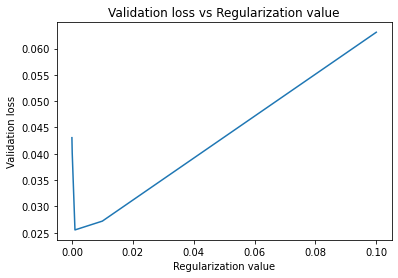

In [18]:
plt.plot(reg,val_loss_reg)
plt.title('Validation loss vs Regularization value')
plt.xlabel('Regularization value')
plt.ylabel('Validation loss')
plt.show()

### 3.  Learning curve experiment

Now I Have trained the model (with the amount of regularisation you selected) on different amounts of training data. 

Plotted the performance (loss/error-rate) of the model on the validation set against the size of the training set. 
This is typically best done on a log-log plot. 

Describe the approximate relationship between the training set size and loss / error-rate.  Does the network performance appear to improve as some power of the amount of data in the training set?  If so, by what power ? 

For example, a very good rate of improvement is for error-rate to be proportional to $\dfrac{1}{\sqrt{n}}$ where $n$ is the training set size.  For your model, the rate of improvement of validation error with training set size may not be as fast as this (or it may, who knows?)  The aim of this exercise is to find out what it actually is. 

In [20]:
# your code here

val_loss_N_MLP, N = [],[100, 200, 400, 600, 800, 1000]
epochs = 3
for n in N:
    print('\n  Dataset set size =',n)
    model = MLP()
    # Declaring Criterion and Optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-5, weight_decay=1e-4)
    for e in range(epochs):
        train_loss = 0.0
        i = 0
        for data, labels in trainloader:
            if i>=n:
                break
            i += 1
              
            # Clear the gradients
            optimizer.zero_grad()
            # Forward Pass
            target = model(data)
            # Find the Loss
            loss = criterion(target,labels)
            # Calculate gradients 
            loss.backward()
            # Update Weights
            optimizer.step()
            # Calculate Loss
            train_loss = loss.item() * data.size(0)
          
        valid_loss = 0.0
        model.eval()     # Optional when not using Model Specific layer
        for data, labels in validloader:
              
            # Forward Pass
            target = model(data)
            # Find the Loss
            loss = criterion(target,labels)
            # Calculate Loss
            valid_loss = loss.item() * data.size(0)
      
        print('Epoch:',e+1,'\t\t Training Loss: ',train_loss / len(trainloader),'\t\t Validation Loss:',valid_loss / len(validloader))
    val_loss_N_MLP.append(valid_loss / len(validloader))


  Dataset set size = 100
Epoch: 1 		 Training Loss:  0.046924901023859864 		 Validation Loss: 0.11743532125942242
Epoch: 2 		 Training Loss:  0.04654465160992233 		 Validation Loss: 0.11565369919846995
Epoch: 3 		 Training Loss:  0.046035210139005515 		 Validation Loss: 0.1139528926569052

  Dataset set size = 200
Epoch: 1 		 Training Loss:  0.04629782629714741 		 Validation Loss: 0.11252244211995183
Epoch: 2 		 Training Loss:  0.045266252104014214 		 Validation Loss: 0.10668991625118561
Epoch: 3 		 Training Loss:  0.04406195974319468 		 Validation Loss: 0.10012322569045777

  Dataset set size = 400
Epoch: 1 		 Training Loss:  0.0443237802575051 		 Validation Loss: 0.10532203649941344
Epoch: 2 		 Training Loss:  0.04055841046880623 		 Validation Loss: 0.09254891880023212
Epoch: 3 		 Training Loss:  0.03637441731536533 		 Validation Loss: 0.07971737407647764

  Dataset set size = 600
Epoch: 1 		 Training Loss:  0.04258524479197907 		 Validation Loss: 0.10001821182787228
Epoch: 2 		 Tra

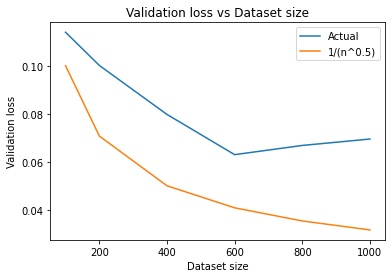

In [21]:
plt.plot(N,val_loss_N_MLP,label='Actual')
plt.plot(N,1/np.array(N)**(0.5),label='1/(n^0.5)')
plt.title('Validation loss vs Dataset size')
plt.xlabel('Dataset size')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

### The graph shows that the validation loss or error rate is almost proportional  to $\dfrac{1}{\sqrt{n}}$

### We could also observe that there is a lot of difference between them

### 4. Second model: CNN

Devise what you believe to be a better neural network architecture for the problem (e.g. for MNIST you might use a fully-connected network for your initial model, and then try a convolutional net for your second model).

Repeat sections 2 (regularisation experiment), and determine whether it has better validation set performance than the first model, for an intermediate size of training set (e.g. 2000 or 4000 for the MNIST data). 

Repeat section 3. Does your model have a different learning curve from the first? Plot the learning curves for the first and second model on the same graph, to compare them. Comment: is there a more rapid reduction of error-rate with training set size for your second model?  

In [22]:
# your code here

class CNN(nn.Module):   
  def __init__(self):
      super(CNN, self).__init__()

      self.cnn_layers = nn.Sequential(
          # Defining a 2D convolution layer
          nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(4),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2, stride=2),
          # Defining another 2D convolution layer
          nn.Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(4),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2, stride=2),
      )

      self.linear_layers = nn.Sequential(
          nn.Linear(4 * 7 * 7, 10)
      )

  # Defining the forward pass    
  def forward(self, x):
      x = self.cnn_layers(x)
      x = x.view(x.size(0), -1)
      x = self.linear_layers(x)
      return x

In [23]:
model = CNN()
criterion = nn.CrossEntropyLoss()

In [25]:
# Training with Validation
epochs = 2
min_valid_loss = np.inf
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
for e in range(epochs):
    train_loss = 0.0
    for data, labels in trainloader:
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients 
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss = loss.item() * data.size(0)
      
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss = loss.item() * data.size(0)
  
    print('Epoch:',e+1,'\t\t Training Loss: ',train_loss / len(trainloader),'\t\t Validation Loss:',valid_loss / len(validloader))

Epoch: 1 		 Training Loss:  0.0005977839822580017 		 Validation Loss: 0.003072192874579384
Epoch: 2 		 Training Loss:  0.00018678093597207098 		 Validation Loss: 0.000659492259589247


In [32]:
# your code here 
epochs=2
val_loss_reg, reg =[],[0, 0.0001, 0.001, 0.01, 0.1]
for r in reg:
    print('\nL2 Regularization value =',r)
    model = CNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=5e-4, weight_decay=r)
    for e in range(epochs):
        train_loss = 0.0
        for data, labels in trainloader:              
            # Clear the gradients
            optimizer.zero_grad()
            # Forward Pass
            target = model(data)
            # Find the Loss
            loss = criterion(target,labels)
            # Calculate gradients 
            loss.backward()
            # Update Weights
            optimizer.step()
            # Calculate Loss
            train_loss = loss.item() * data.size(0)
          
        valid_loss = 0.0
        model.eval()     # Optional when not using Model Specific layer
        for data, labels in validloader:              
            # Forward Pass
            target = model(data)
            # Find the Loss
            loss = criterion(target,labels)
            # Calculate Loss
            valid_loss = loss.item() * data.size(0)
      
        print('Epoch:',e+1,'\t\t Training Loss: ',train_loss / len(trainloader),'\t\t Validation Loss:',valid_loss / len(validloader))
    val_loss_reg.append(valid_loss / len(validloader))


L2 Regularization value = 0
Epoch: 1 		 Training Loss:  0.0004739905501967886 		 Validation Loss: 0.002419120206619604
Epoch: 2 		 Training Loss:  9.333355184251196e-05 		 Validation Loss: 0.00030134351680073115

L2 Regularization value = 0.0001
Epoch: 1 		 Training Loss:  0.0006236318434497445 		 Validation Loss: 0.002224940080612231
Epoch: 2 		 Training Loss:  0.00027114490401035536 		 Validation Loss: 0.000674170474655712

L2 Regularization value = 0.001
Epoch: 1 		 Training Loss:  0.0008142044814214139 		 Validation Loss: 0.002861968244607456
Epoch: 2 		 Training Loss:  0.00030264363255320796 		 Validation Loss: 0.0004867935618653465

L2 Regularization value = 0.01
Epoch: 1 		 Training Loss:  0.0007593315225797667 		 Validation Loss: 0.004922445589741959
Epoch: 2 		 Training Loss:  0.00025067921258361387 		 Validation Loss: 0.0018738205440509052

L2 Regularization value = 0.1
Epoch: 1 		 Training Loss:  0.0019683882126957657 		 Validation Loss: 0.009615262857260415
Epoch: 2 		 Tra

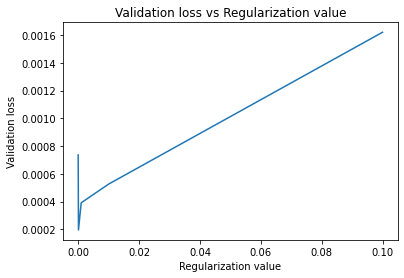

In [29]:
plt.plot(reg,val_loss_reg)
plt.title('Validation loss vs Regularization value')
plt.xlabel('Regularization value')
plt.ylabel('Validation loss')
plt.show()

In [35]:
val_loss_N_CNN, N =  [],[100, 200, 400, 600, 800, 1000]
epochs = 5
for n in N:
    print('\nSize of dataset =',n)
    model = CNN()
    if torch.cuda.is_available():
        model = model.cuda()
    # Declaring Criterion and Optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=5e-4, weight_decay=1e-4)
    for e in range(epochs):
        train_loss = 0.0
        i = 0
        for data, labels in trainloader:
            if i>=n:
                break
            i += 1
            # Transfer Data to GPU if available
            if torch.cuda.is_available():
                data, labels = data.cuda(), labels.cuda()
              
            # Clear the gradients
            optimizer.zero_grad()
            # Forward Pass
            target = model(data)
            # Find the Loss
            loss = criterion(target,labels)
            # Calculate gradients 
            loss.backward()
            # Update Weights
            optimizer.step()
            # Calculate Loss
            train_loss = loss.item() * data.size(0)
          
        valid_loss = 0.0
        model.eval()     # Optional when not using Model Specific layer
        for data, labels in validloader:
            # Transfer Data to GPU if available
            if torch.cuda.is_available():
                data, labels = data.cuda(), labels.cuda()
              
            # Forward Pass
            target = model(data)
            # Find the Loss
            loss = criterion(target,labels)
            # Calculate Loss
            valid_loss = loss.item() * data.size(0)
      
        print('Epoch:',e+1,'\t\t Training Loss: ',train_loss / len(trainloader),'\t\t Validation Loss:',valid_loss / len(validloader))
    val_loss_N_CNN.append(valid_loss / len(validloader))


Size of dataset = 100
Epoch: 1 		 Training Loss:  0.02926976209409864 		 Validation Loss: 0.06410961333936015
Epoch: 2 		 Training Loss:  0.011787694002372366 		 Validation Loss: 0.023311508349336374
Epoch: 3 		 Training Loss:  0.0091347099494568 		 Validation Loss: 0.01698770462133633
Epoch: 4 		 Training Loss:  0.007902167351369437 		 Validation Loss: 0.012880331411148412
Epoch: 5 		 Training Loss:  0.007138523167703522 		 Validation Loss: 0.010060576966014532

Size of dataset = 200
Epoch: 1 		 Training Loss:  0.022462853390821186 		 Validation Loss: 0.028864714284293568
Epoch: 2 		 Training Loss:  0.012875835787235584 		 Validation Loss: 0.014270078640776321
Epoch: 3 		 Training Loss:  0.009188755765147341 		 Validation Loss: 0.010792053545625827
Epoch: 4 		 Training Loss:  0.006792829346366975 		 Validation Loss: 0.008325786255419064
Epoch: 5 		 Training Loss:  0.005152449726829602 		 Validation Loss: 0.006615518381039556

Size of dataset = 400
Epoch: 1 		 Training Loss:  0.007717

## In each and every size of data set, I have taken, I could clearly observe that there is a dramatic decrease in validation loss from epoch1 to epoch 2

### This is a clear indication CNN is a better model as is reduces the validation loss from its 2nd epoch itself

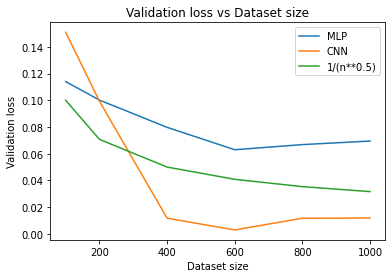

In [41]:
plt.plot(N,val_loss_N_MLP,label='MLP')
plt.plot(N,np.array(val_loss_N_CNN)*15,label='CNN("Multiplied by 15 times for comparision")')
plt.plot(N,1/np.array(N)**(0.5),label='1/(n**0.5)')
plt.title('Validation loss vs Dataset size')
plt.xlabel('Dataset size')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

### We can clearly observe from the above graph that, the error rate reduction is very high in CNN, when compared to MLP model, the CNN is also better when compared to one by square root of n.

#### * ALL THE VALUES ARE CALCUALTED USING SAME HYPER PARAMETERS TO AVOID CONFUSION

# WITH DROPOUT there is no regularization happening, so the results are being given as images along with this file
